In [1]:
import numpy as np
import math as m
from matplotlib import pyplot as plt
import random as r
from  matplotlib.animation import FuncAnimation

In [14]:
## Takes array of data and returns it window averaged
def rolling_avg(arr, window):
    to_return = []
    for i in range(len(arr)):
        lower = int(i-window/2)
        upper = int(i+window/2)
        if lower < 0: lower = 0
        if upper >= len(arr): upper = len(arr)-1
        to_return.append(sum(arr[lower:upper])/(upper-lower))          
    return to_return

In [81]:
class Metropolis():
    
    def __init__(self, L, T=1, initial_state=0, B=False):
        if initial_state==0:
            self.grid = np.ones(shape=[L, L])
            for i in range(L):
                self.grid[i] = np.random.choice([-1, 1], size=L)
        else:
            self.grid = initial_state
        self.L = L
        self.T = T
        self.B = 1/T
        if B:
            self.T = self.B
            self.B = T
        self.N = L*L
        self.energy = self.calc_energy()
        self.energy_history = [self.energy]
        self.grid_history = [np.copy(self.grid)]
        self.M_history = [np.sum(self.grid)]
        
        # This is for a L x L lattice
        x,y=np.indices((L,L))
        red=np.logical_and((x+y) % 2==0   , np.logical_and(x<L-1,y<L-1))
        red[L-1,L-1]=True
        blue=np.logical_and((x+y) % 2==1   , np.logical_and(x<L-1,y<L-1))
        green=np.logical_and((x+y) % 2==0   , np.logical_or(x==L-1,y==L-1))
        green[L-1,L-1]=False
        yellow=np.logical_and((x+y) % 2==1   , np.logical_or(x==L-1,y==L-1))
        self.red = red
        self.blue = blue
        self.green = green
        self.yellow = yellow
        self.colors = [red, blue, green, yellow]
        return
    
    def P(self, E):
        try:
            return m.exp(-self.B*E)
        except:
            print(f"E = {-self.B*E}")
            raise Exception("E too big for m.exp()")
    
    def run(self, sweeps, to_print=False):
        for sweep in range(sweeps):
            for color in self.colors:
                delta_Es = self.find_delta_Es(color)
                to_flip = np.random.random(size=delta_Es.shape) > 1/(1+np.exp(-self.B*delta_Es))
                self.grid[color] = [-spin if flip else spin for spin, flip in zip(self.grid[color], to_flip)]
                self.energy += np.sum(delta_Es*to_flip)
            self.energy_history.append(self.energy)
            self.M_history.append(np.sum(self.grid))
            self.grid_history.append(np.copy(self.grid))
        return
    
    def find_delta_Es(self, color):
        orig = self.grid[color]
        delta_Es = np.zeros(shape=self.grid[color].shape)
        delta_Es += 2*orig * np.roll(self.grid, 1, axis=0)[color]
        delta_Es += 2*orig * np.roll(self.grid, -1, axis=0)[color]
        delta_Es += 2*orig * np.roll(self.grid, 1, axis=1)[color]
        delta_Es += 2*orig * np.roll(self.grid, -1, axis=1)[color]
        return delta_Es
    
    def flip_point(self, pt):
        delta_e = self.grid[pt]
        
    def left(self, point):
        if point[1] == 0:
            return [point[0], self.L-1]
        return [point[0], point[1]-1]
    
    def right(self, point):
        if point[1] == self.L-1:
            return [point[0], 0]
        return [point[0], point[1]+1]
    
    def up(self, point):
        if point[0] == 0:
            return [self.L-1, point[1]]
        return [point[0]-1, point[1]]
    
    def down(self, point):
        if point[0] == self.L-1:
            return [0, point[1]]
        return [point[0]+1, point[1]]
    
    def calc_energy(self, grid=0):
        if type(grid) == int: grid = self.grid
        energy = 0
        for y in range(self.L):
            for x in range(self.L):
                energy += grid[y, x] * self.E_up((y, x))
        return int(energy)
    
    def E_up(self, pt, grid=0, point=False):
        if type(grid) == int: grid = self.grid
        e = 0
        e += -grid[self.up(pt)[0], self.up(pt)[1]]
        e += -grid[self.left(pt)[0], self.left(pt)[1]]
        if point:
            e += -grid[self.down(pt)[0], self.down(pt)[1]]
            e += -grid[self.right(pt)[0], self.right(pt)[1]]
        return e
    
    def get_grid(self):
        return self.grid
    
    def get_energy_history(self):
        return self.energy_history
    
    def get_grid_history(self):
        return self.grid_history
    
    def get_M_history(self):
        return self.M_history

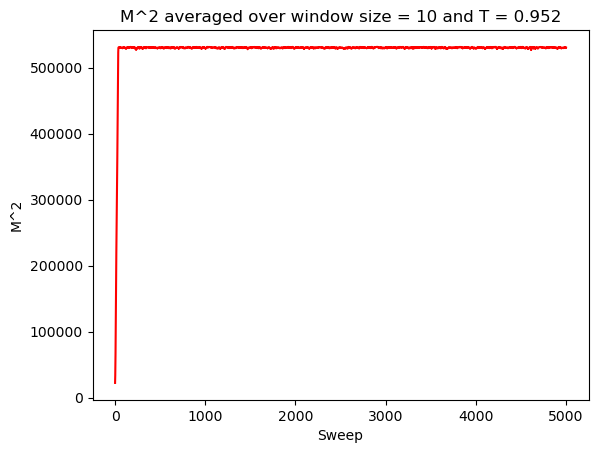

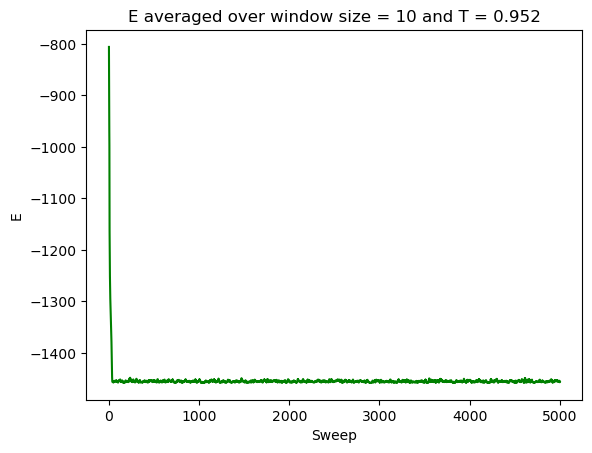

In [118]:
T = 0.952
testing = Metropolis(27, T, B=True)
testing.run(5000)
window = 10

plt.figure()
plt.plot(rolling_avg([M**2 for M in testing.get_M_history()], window), color='r')
plt.title(f"M^2 averaged over window size = {window} and T = {T}")
plt.xlabel("Sweep")
plt.ylabel("M^2")
plt.show()

plt.figure()
plt.plot(rolling_avg(testing.get_energy_history(), window), color='g')
plt.title(f"E averaged over window size = {window} and T = {T}")
plt.xlabel("Sweep")
plt.ylabel("E")
plt.show()

(10001, 27, 27)


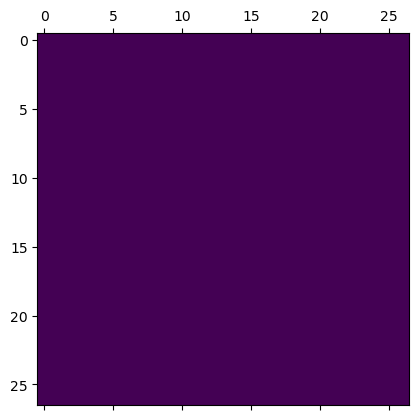

In [89]:
print(np.array(testing.get_grid_history()).shape)
plt.matshow(testing.get_grid_history()[9005])

MovieWriter ffmpeg unavailable; using Pillow instead.


1001


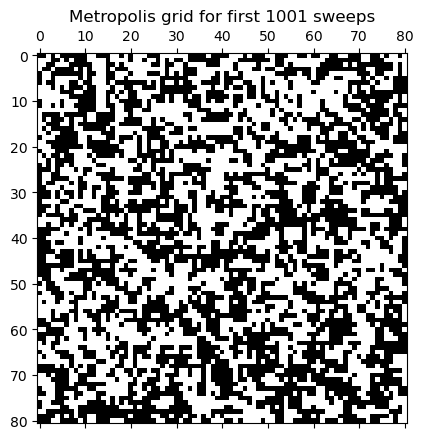

In [138]:
part_frames = testing.get_grid_history()
n_frames = len(part_frames)
print(n_frames)
data = part_frames

fig, ax = plt.subplots()
plot = ax.matshow(data[0], cmap="gray", animated=True)
plt.title(f"Metropolis grid for first {n_frames} sweeps")

def update(i):
    plot.set_array(data[i])
    return [plot]

anim = FuncAnimation(fig, update, frames=n_frames, interval = 1, repeat=True, cache_frame_data=True)
anim.save("metropolis1.gif")
plt.show()

-2


<Figure size 640x480 with 0 Axes>

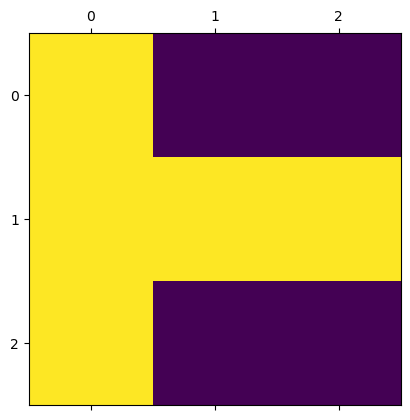

-10


<Figure size 640x480 with 0 Axes>

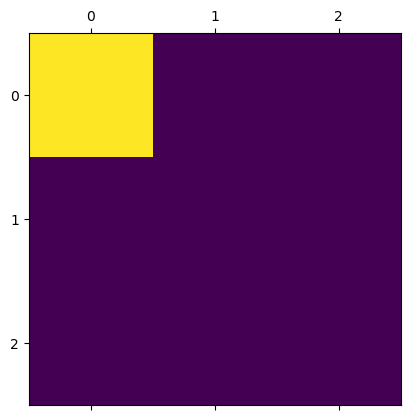

In [7]:
test_metro = Metropolis(3, T = 3)
print(test_metro.calc_energy())
plt.figure()
plt.matshow(test_metro.get_grid())
plt.show()

test_metro.run(10000)
print(test_metro.calc_energy())
plt.figure()
plt.matshow(test_metro.get_grid())
plt.show()

40001


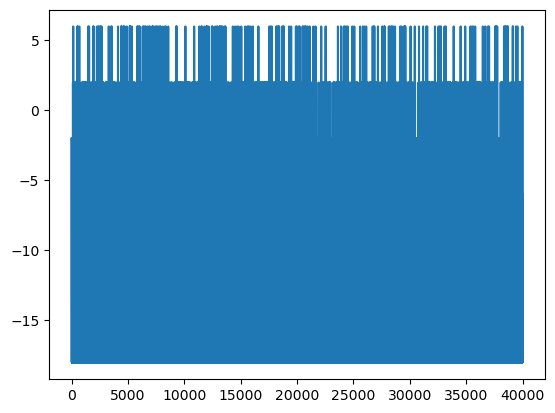

-10.535986256762648


In [8]:
energies = test_metro.get_energy_history()
print(len(energies))
plt.figure()
plt.plot(energies)
plt.show()
print(sum(energies[1000:])/len(energies[1000:]))

In [19]:
Ts = []
E_avgs = []
for T in np.arange(0, 10, 0.05):
    if round(T, 5) == 0: continue
    print(f"Processing with T={T}")
    Ts.append(T)
    test_metro = Metropolis(81, T)
    test_metro.run(1500)
    energies = test_metro.get_energy_history()
    E_avg = sum(energies[100:])/len(energies[100:])
    E_avgs.append(E_avg)
# for T in np.arange(1, 40, 1):
#     print(f"Processing with T={T}")
#     Ts.append(T)
#     test_metro = Metropolis(81, T)
#     test_metro.run(1500)
#     energies = test_metro.get_energy_history()
#     E_avg = sum(energies[100:])/len(energies[100:])
#     E_avgs.append(E_avg)

Processing with T=0.05
Processing with T=0.1
Processing with T=0.15000000000000002
Processing with T=0.2
Processing with T=0.25
Processing with T=0.30000000000000004
Processing with T=0.35000000000000003
Processing with T=0.4
Processing with T=0.45
Processing with T=0.5
Processing with T=0.55
Processing with T=0.6000000000000001
Processing with T=0.65
Processing with T=0.7000000000000001
Processing with T=0.75
Processing with T=0.8
Processing with T=0.8500000000000001
Processing with T=0.9
Processing with T=0.9500000000000001
Processing with T=1.0
Processing with T=1.05
Processing with T=1.1
Processing with T=1.1500000000000001
Processing with T=1.2000000000000002
Processing with T=1.25
Processing with T=1.3
Processing with T=1.35
Processing with T=1.4000000000000001
Processing with T=1.4500000000000002
Processing with T=1.5
Processing with T=1.55
Processing with T=1.6
Processing with T=1.6500000000000001
Processing with T=1.7000000000000002
Processing with T=1.75
Processing with T=1.8

Text(0, 0.5, 'Average Energy After 1st 100 Accepted Flips')

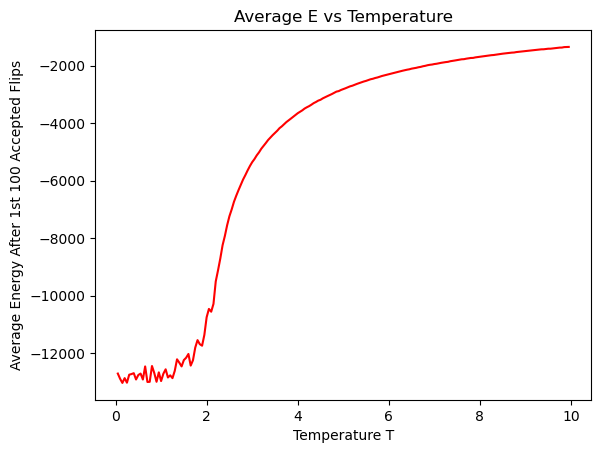

In [20]:
plt.figure()
plt.plot(Ts, E_avgs, color='r')
plt.title("Average E vs Temperature")
plt.xlabel("Temperature T")
plt.ylabel("Average Energy After 1st 100 Accepted Flips")

In [111]:
Bs = []
E_avgs = []
M2_avgs = []
for B in np.arange(0, 1.05, 0.05):
    B = round(B, 5)
    if B == 0: B = 0.00001
    print(f"Processing with B={B}")
    Bs.append(B)
    test_metro = Metropolis(27, B, B=True)
    test_metro.run(7000)
    energies = test_metro.get_energy_history()
    E_avg = sum(energies[3500:])/len(energies[3500:])
    E_avgs.append(E_avg)
    M2 = [M**2 for M in test_metro.get_M_history()]
    M2_avg = sum(M2[1000:])/len(M2[1000:])
    M2_avgs.append(M2_avg)

Processing with B=1e-05
Processing with B=0.05
Processing with B=0.1
Processing with B=0.15
Processing with B=0.2
Processing with B=0.25
Processing with B=0.3
Processing with B=0.35
Processing with B=0.4
Processing with B=0.45
Processing with B=0.5
Processing with B=0.55
Processing with B=0.6
Processing with B=0.65
Processing with B=0.7
Processing with B=0.75
Processing with B=0.8
Processing with B=0.85
Processing with B=0.9
Processing with B=0.95
Processing with B=1.0


In [122]:
import pickle
# observables = [[B, E, M] for B, E, M in zip(Bs, E_avgs, M2_avgs)]
# with open("observables.pkl", "wb") as fp:   #Pickling
#     pickle.dump(observables, fp)

with open("observables.pkl", "rb") as fp:   # Unpickling
    observables = pickle.load(fp)

Bs = [o[0] for o in observables]
E_avgs = [o[1] for o in observables]
M2_avgs = [o[2] for o in observables]

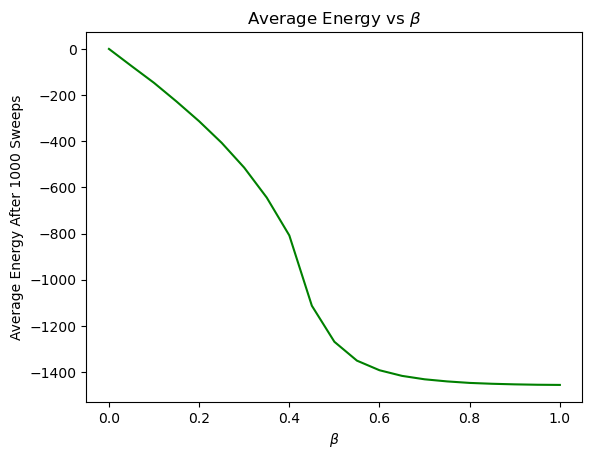

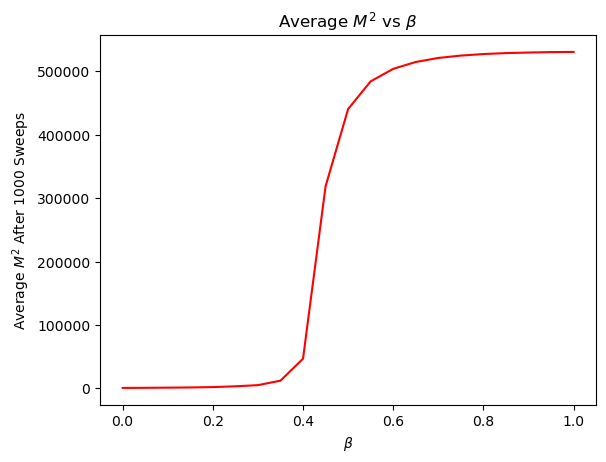

In [123]:
plt.figure()
plt.plot(Bs, E_avgs, color='g')
plt.title(r"Average Energy vs $\beta$")
plt.xlabel(r"$\beta$")
plt.ylabel("Average Energy After 1000 Sweeps")

plt.figure()
plt.plot(Bs, M2_avgs, color='r')
plt.title(r"Average $M^2$ vs $\beta$")
plt.xlabel(r"$\beta$")
plt.ylabel(r"Average $M^2$ After 1000 Sweeps")
plt.show()

In [96]:
close_Bs = []
close_E_avgs = []
close_M2_avgs = []
for B in np.arange(0.94, 0.96, 0.001):
    B = round(B, 5)
    if B == 0: B = 0.00001
    print(f"Processing with B={B}")
    close_Bs.append(B)
    test_metro = Metropolis(27, B, B=True)
    test_metro.run(5000)
    energies = test_metro.get_energy_history()
    E_avg = sum(energies[1000:])/len(energies[1000:])
    close_E_avgs.append(E_avg)
    M2 = [M**2 for M in test_metro.get_M_history()]
    M2_avg = sum(M2[1000:])/len(M2[1000:])
    close_M2_avgs.append(M2_avg)

Processing with B=0.94
Processing with B=0.941
Processing with B=0.942
Processing with B=0.943
Processing with B=0.944
Processing with B=0.945
Processing with B=0.946
Processing with B=0.947
Processing with B=0.948
Processing with B=0.949
Processing with B=0.95
Processing with B=0.951
Processing with B=0.952
Processing with B=0.953
Processing with B=0.954
Processing with B=0.955
Processing with B=0.956
Processing with B=0.957
Processing with B=0.958
Processing with B=0.959
Processing with B=0.96


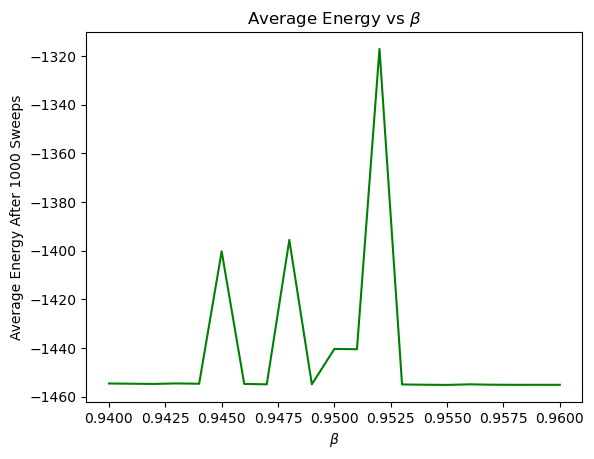

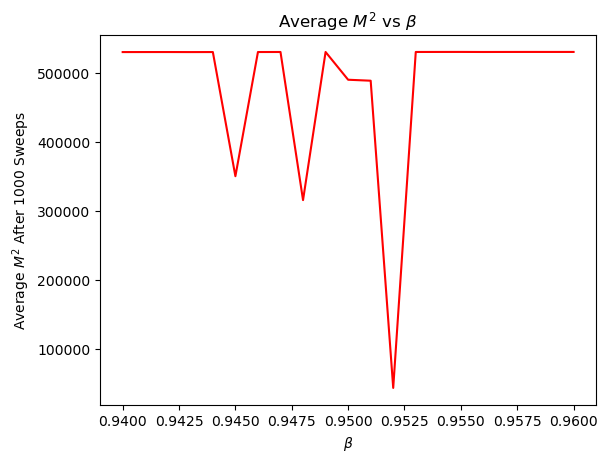

In [97]:
plt.figure()
plt.plot(close_Bs, close_E_avgs, color='g')
plt.title(r"Average Energy vs $\beta$")
plt.xlabel(r"$\beta$")
plt.ylabel("Average Energy After 1000 Sweeps")

plt.figure()
plt.plot(close_Bs, close_M2_avgs, color='r')
plt.title(r"Average $M^2$ vs $\beta$")
plt.xlabel(r"$\beta$")
plt.ylabel(r"Average $M^2$ After 1000 Sweeps")
plt.show()

In [100]:
for i in range(len(close_Bs)):
    print(f"B = {close_Bs[i]}, M^2 = {close_M2_avgs[i]}")

B = 0.94, M^2 = 530163.2134466383
B = 0.941, M^2 = 530201.0099975006
B = 0.942, M^2 = 530224.2521869532
B = 0.943, M^2 = 530150.8525368657
B = 0.944, M^2 = 530198.75856036
B = 0.945, M^2 = 350054.45863534114
B = 0.946, M^2 = 530227.815296176
B = 0.947, M^2 = 530291.8112971757
B = 0.948, M^2 = 315417.7118220445
B = 0.949, M^2 = 530288.8500374906
B = 0.95, M^2 = 490029.7808047988
B = 0.951, M^2 = 488625.1079730067
B = 0.952, M^2 = 42950.678580354914
B = 0.953, M^2 = 530309.3169207698
B = 0.954, M^2 = 530354.2816795801
B = 0.955, M^2 = 530385.6738315421
B = 0.956, M^2 = 530288.9640089978
B = 0.957, M^2 = 530345.047988003
B = 0.958, M^2 = 530368.8680329918
B = 0.959, M^2 = 530355.1174706323
B = 0.96, M^2 = 530368.9300174956
